$\newcommand{\xbf}{{\bf x}}
\newcommand{\ybf}{{\bf y}}
\newcommand{\wbf}{{\bf w}}
\newcommand{\Ibf}{\mathbf{I}}
\newcommand{\Vbf}{\mathbf{V}}
\newcommand{\Xbf}{\mathbf{X}}
\newcommand{\Rbb}{\mathbb{R}}
\newcommand{\Phibf}{\pmb{\Phi}}
\newcommand{\vec}[1]{\left[\begin{array}{c}#1\end{array}\right]}
$


# Introduction aux réseaux de neurones 
Matériel de cours rédigé par Pascal Germain, 2019
************

In [1]:
import numpy as np
import aidecours
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

from aidecours import code_button as CB
aidecours.center_images(); CB()

# Cacher ce neurone que je ne saurais voir

Un *réseau de neurones artificiels* n'est qu'un simple *graphe de calcul*, qui exprime une fonction (possiblement) complexe comme une succession d'opérations simples. 

Commencons par examiner un réseau de neurones très simple, possédant deux neurones d'entrées et un neurone de sortie. Ce réseau représente une fonction $R_\wbf: \Rbb^2 \to \Rbb$, que nous illustrons ainsi:

<p>
<center><img src="images/reseau_simple_.png"/></center>


Le réseau $R_\wbf$ ci-dessus reçoit deux valeurs en entrée: $x_1$ et $x_2$. Ces valeurs sont respectivement multipliées par les poids $w_1$ et $w_2$. Le neurone de droite reçoit les valeurs $w_1 x_1$ et $w_2 x_2$, et les combine en appliquant la fonction $f$. La valeur obtenue correspond à la sortie du réseau. 

$$R_\wbf\left({\small\vec{x_1\\[-3mm]x_2}}\right) = f(w_1 x_1+w_2 x_2)\,.$$

## Régression: Le neurone linéaire

Par exemple, si $f$ est la fonction identitée $f(x)=x$, ce réseau représente l'opération:

$$R_\wbf\left({\small\vec{x_1\\[-3mm]x_2}}\right) = f(w_1 x_1 +  w_2 x_2) = w_1 x_1 + w_2 x_2\,.$$

Nous avons donc ici d'un réseau de neurones dans sa plus simple expression, représentant un produit scalaire entre un vecteur $\xbf = (x_1,x_2)$ et un vecteur $\wbf = (w_1,w_2)$ :
$$R_\wbf({\xbf}) = \wbf\cdot \xbf\,.$$

En réalité, un réseau de neuronnes possédera généalement plus de 2 entrées. On notera $d$ la dimension de l'espace d'entré du réseau (le nombre de neurones d'entrée). On a donc $\xbf\in\Rbb^d$ et $\wbf\in\Rbb^d$.

$$R_\wbf({\xbf}) = \sum_{i=1}^d w_i x_i = \wbf\cdot \xbf\,.$$

<center><img src="images/reseau_simple_d.png" style="height: 200px;"/></center>

### Entraînement du réseau
Typiquement, l'entraînement d'un réseau de neurones consistera a présenter au réseau un ensemble d'apprentissage afin qui «apprenne» les poids ${\bf w}$. 

Cet **ensemble d'apprentissage** sera noté $S$ et contiendra $n$ observations,

$$S = \{ ({\bf x}_1, y_1), ({\bf x}_2, y_2), \ldots, ({\bf x}_n, y_n) \}\,,$$

où une *observation* est un couple entrée-sortie $({\bf x}, y)$.

### Fonction de perte

Afin de guider le processus d'apprentissage, nous devons choisir une fonction de perte $L\big(y',y\big)$. L'apprentissage consistera alors à résoudre le problème suivant:

$$\min_\wbf \left[\frac1n \sum_{i=1}^n L\Big(R_\wbf(\xbf_i), y_i\Big)\right].$$ 

### Perte quadratique

Prenons l'exemple de la perte quadratique:

$$L_{\rm quad}\big(y', y\big) = (y'-y)^2\,.$$

Ici, on note $y'$ l'étiquette prédite par le réseau de neurones et $y$ la véritable étiquette d'une observation $\xbf$.

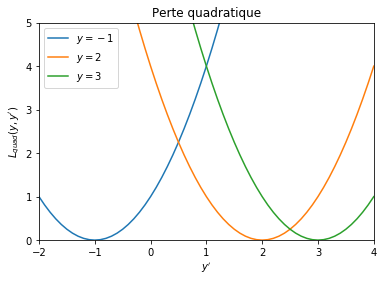

In [2]:
def perte_quadratique(y_prime, y):
    return (y_prime-y)**2

for y in (-1, 2, 3):
    aidecours.show_1d_function(lambda a: perte_quadratique(a, y), -2, 4, label=f'$y={y}$');

plt.xlim(-2,4), plt.ylim(0,5)
plt.title('Perte quadratique'); plt.xlabel('$y\'$'); plt.ylabel('$L_{quad}(y,y\')$'); CB()

Le problème d'apprentissage devient alors
$$\min_\wbf \left[\frac1n \sum_{i=1}^n (\wbf\cdot\xbf_i- y_i)^2\right].$$ 

Imaginons un ensemble d'entraîment à 3 observations:

$$
S =  \Big\{\, \big([1,1], {-}1\big), \,
\big([0,-1], 3\big), \,
\big([2,0.5], 2\big)\,\Big\}
$$

Illustrons la fonction objectif correspondante:

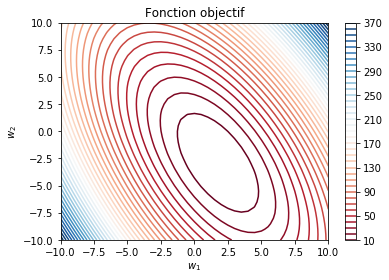

In [3]:
x = np.array([(1,1),(0,-1),(2,.5)])
y = np.array([-1,3,2])
def calc_perte_quadratique(w): return np.mean((x @ w - y) ** 2)

aidecours.show_2d_function(calc_perte_quadratique, -10, 10, .5)
plt.title('Fonction objectif'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); CB()

### C'est la méthode des moindres carrés!

On sait comment trouver la réponse exacte au problème d'optimisation.

En représentant les observations $S$ sous forme matricielle,

$$ 
\Xbf = \left[ \begin{array}{cc}
1& 1\\
0& -1\\
2& \frac12
\end{array} \right],
\quad\ybf = \left[ \begin{array}{c}
-1\\
3\\
2
\end{array} \right]
$$

On sait que 
$\wbf^* = (\Xbf^T \Xbf)^{-1} \Xbf^T \ybf \approx (1.76, -2.90)$

voir: <https://fr.wikipedia.org/wiki/M%C3%A9thode_des_moindres_carr%C3%A9s>

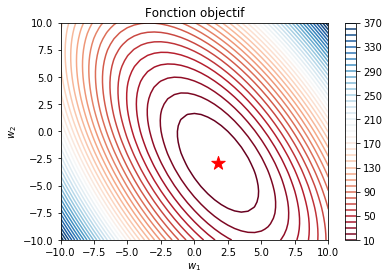

In [4]:
w_opt = np.linalg.inv(x.T @ x) @ x.T @ y
aidecours.show_2d_function(calc_perte_quadratique, -10, 10, .5)
plt.scatter(*w_opt, s=200, marker='*', c='r')
plt.title('Fonction objectif'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); CB()

### Régularisation 

Comme tout algorithme d'apprentissage, un réseau de neurone est susceptible de *surapprendre* les données d'apprentissage. Nous verrons dans ce cours quelques techniques pour se prémunir les réseaux de neurones contre le surapprentisage. 

### Régularisation $\mathrm{L}^2$

La première technique est d'ajouter un régularisateur à la fonction objectif. Il est fréquent d'utiliser la norme Euclidienne des poids $\wbf$ au carré comme fonction de régularisation:

$$\min_\wbf \left[\frac1n \sum_{i=1}^n L\big(R_\wbf(\xbf_i), y_i\big) + \frac\lambda2\|\wbf\|^2\right].$$ 
Ici, $\lambda>0$ est un *hyperparamètre* de la procédure d'entraîment du réseau de neurones.

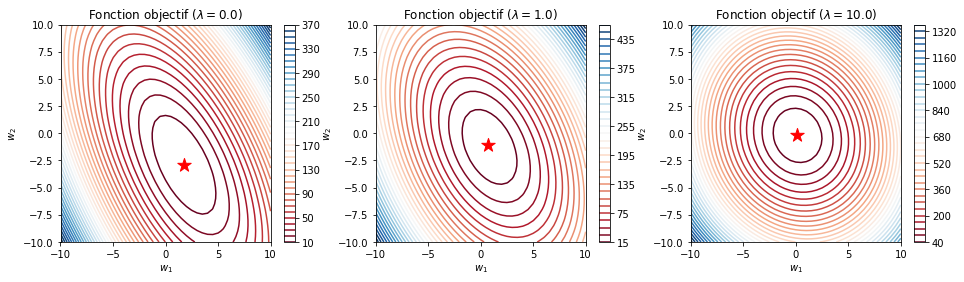

In [5]:
lambdas = (0., 1., 10.)
fig, axes = plt.subplots(1, len(lambdas), figsize=(16, 4))
for param_lambda, ax in zip(lambdas, axes):
    def calc_perte_quadratique_regularisee(w): 
        return np.mean((x @ w - y) ** 2) + param_lambda * (w @ w) / 2
    aidecours.show_2d_function(calc_perte_quadratique_regularisee, -10, 10, .5, ax=ax) 
    w_opt = np.linalg.inv(x.T @ x + param_lambda * np.eye(2) * 2) @ x.T @ y
    ax.scatter(*w_opt, s=200, marker='*', c='r')
    plt.title(f'Fonction objectif ($\lambda = {param_lambda}$)'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$');
CB()

### C'est la régression de Ridge (c.-à-d. les moindres carrés régularisés)

On sait comment trouver la réponse exacte au problème d'optimisation.

En représentant les observations $S$ sous forme matricielle,

$$ 
\Xbf = \left[ \begin{array}{cc}
1& 1\\
0& -1\\
2& \frac12
\end{array} \right],
\quad\ybf = \left[ \begin{array}{c}
-1\\
3\\
2
\end{array} \right],
$$
on sait que 
$\wbf^* = (\Xbf^T \Xbf+\lambda n\Ibf )^{-1} \Xbf^T \ybf\,.$

$\lambda$ |$\longrightarrow$  | $w_1^*$ | $w_2^*$ 
----------|-|---------|--------
0         |$\longrightarrow$  | 1.76 | -2.90 
1         |$\longrightarrow$   | 0.73 | -1.05 
10        |$\longrightarrow$   | 0.13 | -0.15 


voir: <https://fr.wikipedia.org/wiki/R%C3%A9gularisation_de_Tikhonov>

## Classification: Le neurone sigmoïdale

La combinaison de le nurone de sortie linéaire et de la perte quadratique convient bien aux problèmes de régression (où les étiquettes sont des valeurs réelles ($y\in\Rbb$). 

Imaginons maintenant que nous voulons résoudre un problème de classification binaire:

$$y\in\{0,1\}$$

Reprenons notre réseau de neurones simplifié.

<p>
<center>
<img src="images/reseau_simple_.png"/>
</center>

Nous allons considérer que le neurone de sortie applique la **fonction sigmoidale**, habituellement notée $\sigma$: 

$$f(x) = \sigma(x) = \frac{1}{1+e^{-x}}\,.$$

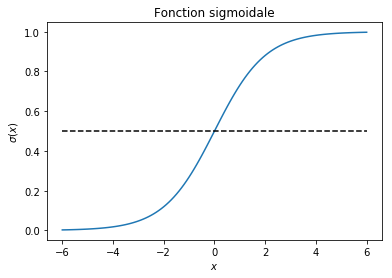

In [6]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
   
aidecours.show_1d_function(sigmoid, -6, 6, constante_x=.5); 
plt.title('Fonction sigmoidale'); plt.xlabel('$x$'); plt.ylabel('$\sigma(x)$'); CB()

La sortie du réseau de neurones sera donc comprise entre $0$ et $1$. 
On considère que l'étiquette prédite est $y=0$ lorsque 

$$R_\wbf(\xbf) = \sigma(\wbf\cdot\xbf) < 0.5\,,$$
et $y=1$ sinon.

Une sortie près de $0.5$ est interprétée comme une grande incertitude envers le résultat. Inversement, plus la sortie est près de $0$ ou de $1$, plus on considère que le réseau est *confiant* envers sa décision.

Une interprétation *bayésienne* de la sortie du neurone sigmoïdal est de la voir comme la probabilité, selon le réseau $R_\wbf$, que $y=1$ pour une  certaine observation $\xbf$:

$$P(y = 1\,|\,\xbf; \wbf) \ = \ \sigma(\wbf\cdot\xbf) \,.$$
Conséquemment:
$$P(y = 0\,|\,\xbf; \wbf)  \ = \ 1 - P(y = 1\,|\,\xbf; \wbf) \ =\ 1 - \sigma(\wbf\cdot\xbf) \,.$$

Lors de l'apprentissage, on désire pénaliser le réseau d'autant plus que la probabilité attribuée à l'étiquette d'une observation s'éloigne de la véritable étiquette. La fonction de perte utilisée dans ce contexte est nommé la perte du **négatif log vraisemblance**:
 
$$\begin{align}
L_{\rm nlv}\big(y', y\big) = &- y \log(y') - (1-y)\log(1-y') \\[2mm]
= &\begin{cases}
-\log(1-y') & \mbox{si $y=0$ ,} \\[1mm]
-\log(y') & \mbox{si $y=1$  .}
\end{cases}\end{align}$$


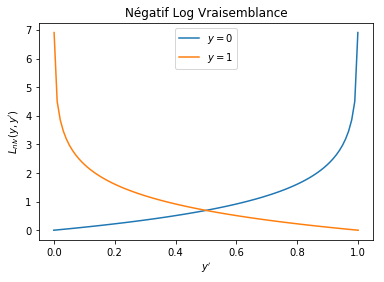

In [7]:
def perte_nlv_y0(y_prime):
    return - np.log(1. - y_prime) 
def perte_nlv_y1(y_prime):
    return - np.log(y_prime) 

aidecours.show_1d_function(perte_nlv_y0, 0, 0.999, .01, label='$y=0$');
aidecours.show_1d_function(perte_nlv_y1, 0.001, 1, .01, label='$y=1$');
plt.title('Négatif Log Vraisemblance'); plt.xlabel('$y\'$'); plt.ylabel('$L_{nlv}(y,y\')$'); CB()

#### Récapitulons.

1. Le neurone de sortie applique la fonction sigmoïdale à la somme de ses entrées:

$$\sigma(\wbf\cdot\xbf) = \frac{1}{1+e^{-\wbf\cdot\xbf}}\,.$$
2. Si $\sigma(\wbf\cdot\xbf) > 0.5$, on déclare que $y=1$.

3. Lors de l'apprentissage, on pénalise selon 

$$
\begin{align}
L_{\rm nlv}\Big(\sigma(\wbf\cdot\xbf), y\Big) 
&= - y \log(\sigma(\wbf\cdot\xbf)) - (1-y)\log(1-\sigma(\wbf\cdot\xbf))\\
&= \quad\vdots\\[1mm]
&= - y \wbf\cdot\xbf + \log(1+e^{\wbf\cdot\xbf})
\end{align}$$

La fonction objectif est alors:
$$
\min_\wbf \left[\frac1n \sum_{i=1}^n - y_i \wbf\cdot\xbf_i + \log(1+e^{\wbf\cdot\xbf_i})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

### Il s'agit de la régression logistique!

**À démontrer en exercice**

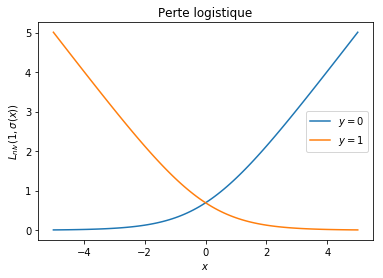

In [8]:
aidecours.show_1d_function(lambda a: perte_nlv_y0(sigmoid(a)), label='$y=0$');
aidecours.show_1d_function(lambda a: perte_nlv_y1(sigmoid(a)), label='$y=1$');
plt.title('Perte logistique'); plt.xlabel('$x$'); plt.ylabel('$L_{nlv}(1,\sigma(x))$'); CB()

### Exemple de classification

Ci-dessous, nous générons au hasard un ensemble de 100 observations en deux dimensions à l'aide de la fonction
`sklearn.datasets.make_blobs` 

(voir: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

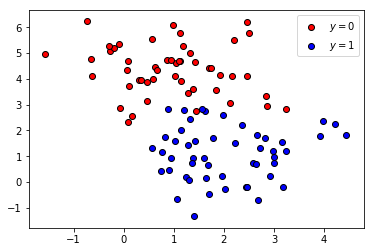

In [9]:
x, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1, random_state=0)

aidecours.show_2d_dataset(x, y); CB()

Illustrons la fonction à optimiser (avec $\lambda=0.01$):
    
$$
\frac1n \sum_{i=1}^n - y_i \wbf\cdot\xbf_i + \log(1+e^{\wbf\cdot\xbf_i})+ \frac\lambda2\|\wbf\|^2\,.
$$ 

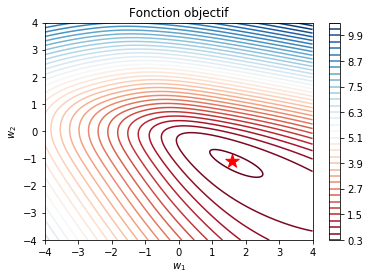

In [10]:
def calc_perte_logistique(w):
    pred = sigmoid(x @ w)
    pred[y==0] = 1-pred[y==0]
    return np.mean(-np.log(pred)) + .01*w @ w/2
    
aidecours.show_2d_function(calc_perte_logistique, -4, 4, .05)
w_opt =[ 1.59526315, -1.09703947]
plt.scatter(*w_opt, s=200, marker='*', c='r')
plt.title('Fonction objectif'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); CB()    

L'optimum se trouve en $\wbf^* \approx \vec{1.60\\ -1.10}\,$.

Ce qui correspond au prédicteur suivant.

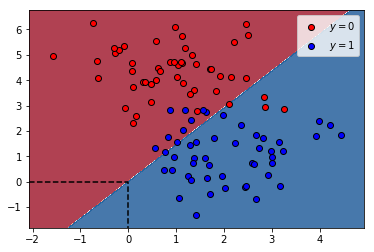

In [11]:
from sklearn.linear_model import LogisticRegression
algo = LogisticRegression(C=100./len(y), fit_intercept=False)
algo.fit(x, y)
coord=aidecours.show_2d_predictions(x, y, algo.predict)
plt.plot([coord[0],0,0], [0,0,coord[2]], '--k');
#print('vecteur w :', algo.coef_[0])
#print('biais b   :', algo.intercept_)
CB()

## Ajout d'un biais

Pour éviter de restreindre la fonction de prédiction à passer par l'origine, on ajoute un **biais**:

<center><img src="images/reseau_simple_biais.png" style="height: 200px;"/></center>

Dans le cas de notre réseau simple, la fonction de prédiction devient alors:

$$R_{\wbf,b}({\xbf}) = f\left(\sum_{i=1}^d w_i x_i + b\right) = f\big(\wbf\cdot \xbf+b\big).$$

Retournons à notre exemple de régression logistique (c'est-à-dire le réseau de neurone où le neurone de sortie $f$ est la **fonction sigmoïdale** $\sigma$ et a perte du **négatif log vraisemblance** $L_{\rm nlv}$. Le problème d'optimisation **avec biais** s'exprime ainsi:

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\xbf_i+b) + \log(1+e^{\wbf\cdot\xbf_i+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

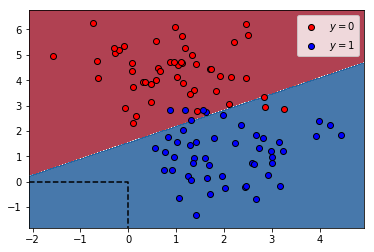

In [12]:
algo = LogisticRegression(C=100/len(y), fit_intercept=True)
algo.fit(x, y)
coord=aidecours.show_2d_predictions(x, y, algo.predict)
plt.plot([coord[0],0,0], [0,0,coord[2]], '--k'); CB()
#print('vecteur w :', algo.coef_[0])
#print('biais b   :', algo.intercept_[0])
CB()

L'optimum se trouve en $\wbf^* \approx \vec{0.97\\ -1.52}, b \approx 2.33\,$.

In [13]:
import numpy as np
import aidecours
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles

from aidecours import code_button as CB
aidecours.center_images(); CB()

## Limitations des prédicteurs linéaires
Le réseau simple étudié jusqu'à maintenant ne peut que générer des prédicteurs **linéaires**.

(de la forme $\wbf\cdot\xbf + b$)

<p>
<center><img src="images/reseau_simple_biais.png"/></center>

À titre d'exemple, considérons ce problème de classification en deux dimensions, généré à l'aide de la fonction
`sklearn.datasets.make_circles` 

(voir: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

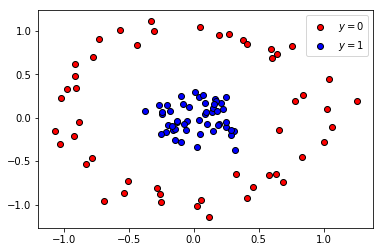

In [14]:
x, y = make_circles(n_samples=100, noise=.1, factor=0.2, random_state=10)
aidecours.show_2d_dataset(x, y); CB()

Voici le résultat de la régression logistique.

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\xbf_i+b) + \log(1+e^{\wbf\cdot\xbf_i+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

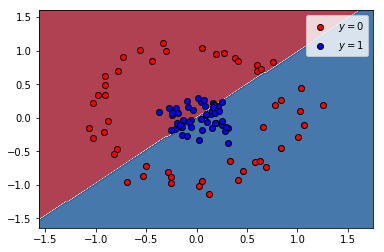

In [15]:
from sklearn.linear_model import LogisticRegression
algo = LogisticRegression()
algo.fit(x, y)
coord = aidecours.show_2d_predictions(x, y, algo.predict) 
CB()

## Choix d'une nouvelle représentation

Transformons les données en leur appliquant une fonction $\Phibf:\Rbb^2\to\Rbb^4$:

$${\Phibf} : \vec{x_1 \\ x_2} \, \mapsto \, \vec{x_1 \\ x_2 \\ x_1^2\\ x_2^2}$$



<center><img src="images/reseau_simple_phi.png"/></center>

Appliquons maintenant la régression logistique sur l'ensemble transformé:

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\Phibf(\xbf_i)+b) + \log(1+e^{\wbf\cdot\Phibf(\xbf_i)+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

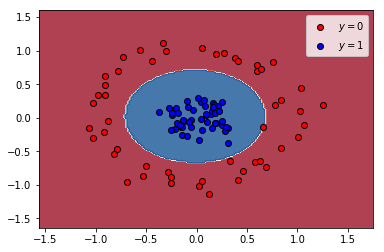

In [16]:
def phi(x):
    return np.hstack((x, (x[:,0]**2).reshape(-1,1), (x[:,1]**2).reshape(-1,1)))

algo = LogisticRegression()
algo.fit(phi(x), y)
aidecours.show_2d_predictions(x, y, lambda a: algo.predict(phi(a))) 
CB()

## Réseau à une couche cachée

En ajoutant une **couche cachée** au réseau de neurone, nous lui permettons *d'apprendre* la fonction de transformation appropriée.

<p>
<center><img src="images/reseau_simple_2couches.png"/></center>

Le réseau $R_{\Vbf,\wbf}(\xbf) = f\Big(\wbf\, h\big(\Vbf \xbf\big)\Big)$ ci-dessus est paramêtré par une matrice $\Vbf$ et un vecteur $\wbf$:

$$\xbf = \vec{x_1\\x_2} ; \quad
\Vbf=\vec{v_{11} & v_{12} \\
          v_{21} & v_{22} \\ 
          \vdots & \vdots \\
          v_{D1} & v_{D2} }; \quad
\wbf = \vec{w_1 & w_2 & \cdots& w_D}
$$



## Fonction d'activation
Nous avons déjà vu deux choix pour la *fonction d'activation* de la sortie du réseau:
* La fonction linéaire: $f(a) = a$
* La fonction sigmoïdale $f(a) = \sigma(a) = \dfrac{1}{1+e^{-a}}\,.$

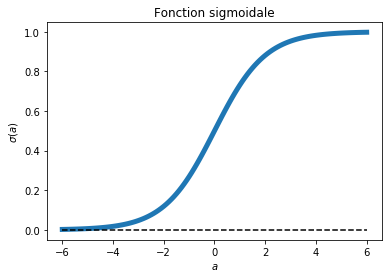

In [17]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
   
aidecours.show_1d_function(sigmoid, -6, 6, constante_x=0, linewidth=5); 
plt.title('Fonction sigmoidale'); plt.xlabel('$a$'); plt.ylabel('$\sigma(a)$'); CB()

## Fonction d'activation

<center><img src="images/reseau_simple_2couches.png"/></center>

Nous examinerons deux choix possible de fonction $h$ pour la couche cachée:
* La tangente hyperbolique (tanh)
* La *rectified linear unit* (ReLU)

### Tangente hyperbolique

$$h(x) = \tanh(x) = 2\sigma\big(2x\big) - 1$$

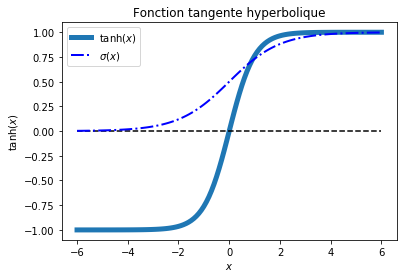

In [18]:
aidecours.show_1d_function(np.tanh, -6, 6, constante_x=0, linewidth=5, label='$\\tanh(x)$'); 
aidecours.show_1d_function(lambda x: sigmoid(x), -6, 6, c='b', linestyle='-.', linewidth=2, label='$\sigma(x)$'); 
plt.title('Fonction tangente hyperbolique'); plt.xlabel('$x$'); plt.ylabel('$\mathrm{tanh}(x)$'); CB()

### Rectified Linear Unit (ReLU)
$$h(x) = \mathrm{relu}(x) = \max(0, x)$$

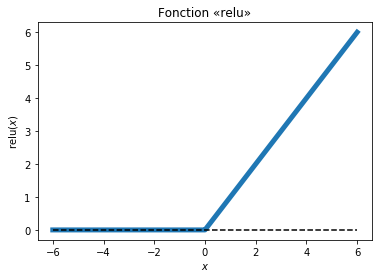

In [19]:
def relu(x):
    return np.maximum(0, x)
aidecours.show_1d_function(relu, -6, 6, constante_x=0, linewidth=5); 
plt.title('Fonction «relu»'); plt.xlabel('$x$'); plt.ylabel('$\mathrm{relu}(x)$'); CB()

## Quelques exemples de prédictions de réseaux de neurones

#### 4 neurones sur la couche cachée, fonction d'activation ReLU

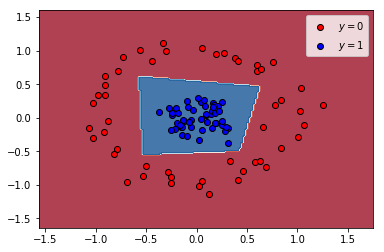

In [20]:
from sklearn.neural_network import MLPClassifier
algo = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(4,), random_state=1)
algo.fit(x, y)
aidecours.show_2d_predictions(x, y, algo.predict); CB()

#### 10 neurones sur la couche cachée, fonction d'activation ReLU

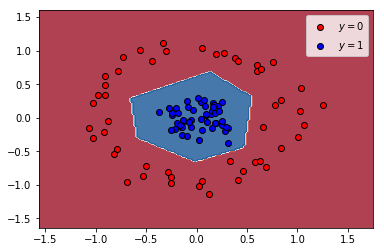

In [21]:
algo = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=1)
algo.fit(x, y)
aidecours.show_2d_predictions(x, y, algo.predict); CB()

#### 10 neurones sur la couche cachée, fonction d'activation tanh

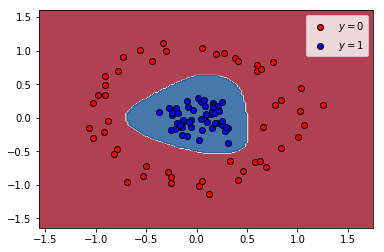

In [22]:
algo = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=1)
algo.fit(x, y)
aidecours.show_2d_predictions(x, y, algo.predict); CB()